In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from NN_library.MN.material_NN import *
from save_load import *

Using device: cuda


In [3]:
L = 2*np.pi
N = 512 # number of nodes in each direction including the border
x = np.linspace(0, L, N, endpoint=True)
y = np.linspace(0, L, N, endpoint=True)
XY = np.meshgrid(x, y)

def a_function(x,y):
    a = np.where((x>np.pi/2)&(x<3*np.pi/2)&(y>np.pi/2)&(y<3*np.pi/2), 0, 1)
    return a

def a_smooth(x,y,eps):
    x_dir = 0.5 + 0.5*np.tanh(eps*np.sin(x-np.pi/2))
    y_dir = 0.5 + 0.5*np.tanh(eps*np.sin(y-np.pi/2))
    a = 1 - 0.9*x_dir*y_dir
    return a

mat_net = Material_NN()
args = {'lr' : 0.001, 'epochs' : 30000, 'dev' : dev, 'name' : f'NN_library/MN/MN_16'}
mat_net = load_network(mat_net, args['name']+'_29999', args)
grid_data = torch.tensor(np.vstack((XY[0].flatten(), XY[1].flatten())).T, dtype=torch.float)

def a_net(x):
    a = 0.1 + 0.9*mat_net(x).detach()
    return a

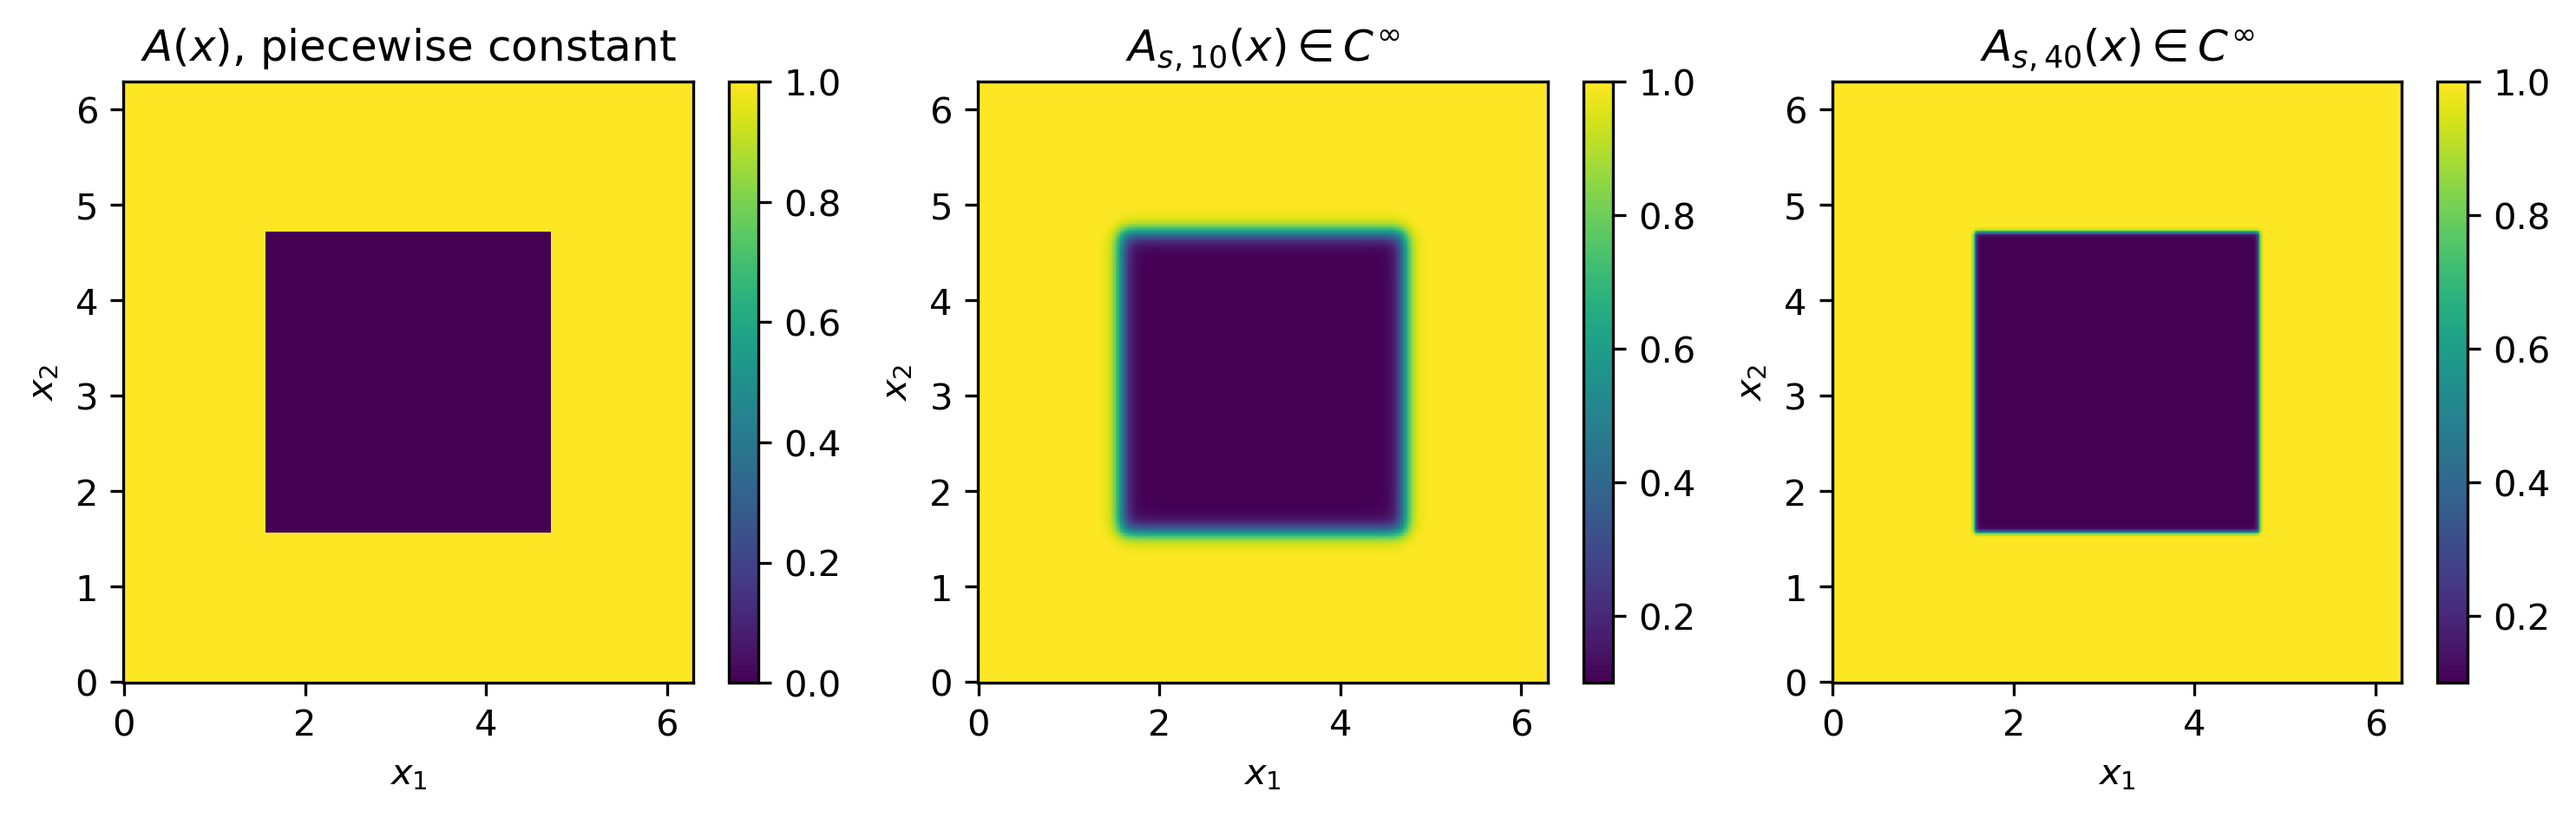

In [4]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,3), dpi=300)

pos1 = axs[0].pcolormesh(XY[0], XY[1], a_function(XY[0].flatten(), XY[1].flatten()).reshape(N, N))
axs[0].set_xlabel('$x_1$')
axs[0].set_ylabel('$x_2$')
axs[0].set_title('$A(x)$, piecewise constant')
fig.colorbar(pos1, ax=axs[0])

pos2 = axs[1].pcolormesh(XY[0], XY[1], a_smooth(XY[0].flatten(), XY[1].flatten(), 10).reshape(N, N))
axs[1].set_xlabel('$x_1$')
axs[1].set_ylabel('$x_2$')
axs[1].set_title('$A_{s,10}(x) \in C^{\infty}$')
fig.colorbar(pos2, ax=axs[1])

pos3 = axs[2].pcolormesh(XY[0], XY[1], a_smooth(XY[0].flatten(), XY[1].flatten(), 40).reshape(N, N))
axs[2].set_xlabel('$x_1$')
axs[2].set_ylabel('$x_2$')
axs[2].set_title('$A_{s,40}(x) \in C^{\infty}$')
fig.colorbar(pos3, ax=axs[2])

In [5]:
A_ex = 1 * np.sqrt((1 + 3*0.1) / (3*1 + 0.1))
pars = [7**2, 127**2]
a_ex = [1, 1]

In [6]:
upper_bounds_FE = []
lower_bounds_FE = []
grid_size = np.array([8, 16, 32, 64, 128]) + 1
for N in grid_size:
    upper_bounds_FE.append(np.load(f'bounds/exact/A_u_fem_{N}.npy')[0,0])
    lower_bounds_FE.append(np.load(f'bounds/exact/A_l_fem_{N}.npy')[0,0])
upper_bounds_FE = np.array(upper_bounds_FE)
lower_bounds_FE = np.array(lower_bounds_FE)

In [7]:
par_size = np.array([65, 391, 1801, 15601])

upper_bounds_PINN_10 = []
lower_bounds_PINN_10 = []
upper_bounds_PINN_i_10 = []
lower_bounds_PINN_i_10 = []

eps = 10
for N in par_size:
    upper_bounds_PINN_10.append(np.load(f'bounds/square/A_u_PINN_{N}_{eps}.npy')[0])
    lower_bounds_PINN_10.append(np.load(f'bounds/square/A_l_PINN_{N}_{eps}.npy')[0])
    upper_bounds_PINN_i_10.append(np.load(f'bounds/square/A_u_PINN_{N}_{eps}.npy')[1])
    lower_bounds_PINN_i_10.append(np.load(f'bounds/square/A_l_PINN_{N}_{eps}.npy')[1])

upper_bounds_PINN_10 = np.array(upper_bounds_PINN_10)
lower_bounds_PINN_10 = np.array(lower_bounds_PINN_10)
upper_bounds_PINN_i_10 = np.array(upper_bounds_PINN_i_10)
lower_bounds_PINN_i_10 = np.array(lower_bounds_PINN_i_10)

upper_bounds_PINN_20 = []
lower_bounds_PINN_20 = []
upper_bounds_PINN_i_20 = []
lower_bounds_PINN_i_20 = []

eps = 20
for N in par_size:
    upper_bounds_PINN_20.append(np.load(f'bounds/square/A_u_PINN_{N}_{eps}.npy')[0])
    lower_bounds_PINN_20.append(np.load(f'bounds/square/A_l_PINN_{N}_{eps}.npy')[0])
    upper_bounds_PINN_i_20.append(np.load(f'bounds/square/A_u_PINN_{N}_{eps}.npy')[1])
    lower_bounds_PINN_i_20.append(np.load(f'bounds/square/A_l_PINN_{N}_{eps}.npy')[1])

upper_bounds_PINN_20 = np.array(upper_bounds_PINN_20)
lower_bounds_PINN_20 = np.array(lower_bounds_PINN_20)
upper_bounds_PINN_i_20 = np.array(upper_bounds_PINN_i_20)
lower_bounds_PINN_i_20 = np.array(lower_bounds_PINN_i_20)

upper_bounds_PINN_30 = []
lower_bounds_PINN_30 = []
upper_bounds_PINN_i_30 = []
lower_bounds_PINN_i_30 = []

eps = 30
for N in par_size:
    upper_bounds_PINN_30.append(np.load(f'bounds/square/A_u_PINN_{N}_{eps}.npy')[0])
    lower_bounds_PINN_30.append(np.load(f'bounds/square/A_l_PINN_{N}_{eps}.npy')[0])
    upper_bounds_PINN_i_30.append(np.load(f'bounds/square/A_u_PINN_{N}_{eps}.npy')[1])
    lower_bounds_PINN_i_30.append(np.load(f'bounds/square/A_l_PINN_{N}_{eps}.npy')[1])

upper_bounds_PINN_30 = np.array(upper_bounds_PINN_30)
lower_bounds_PINN_30 = np.array(lower_bounds_PINN_30)
upper_bounds_PINN_i_30 = np.array(upper_bounds_PINN_i_30)
lower_bounds_PINN_i_30 = np.array(lower_bounds_PINN_i_30)

upper_bounds_PINN_40 = []
lower_bounds_PINN_40 = []
upper_bounds_PINN_i_40 = []
lower_bounds_PINN_i_40 = []

eps = 40
for N in par_size:
    upper_bounds_PINN_40.append(np.load(f'bounds/square/A_u_PINN_{N}_{eps}.npy')[0])
    lower_bounds_PINN_40.append(np.load(f'bounds/square/A_l_PINN_{N}_{eps}.npy')[0])
    upper_bounds_PINN_i_40.append(np.load(f'bounds/square/A_u_PINN_{N}_{eps}.npy')[1])
    lower_bounds_PINN_i_40.append(np.load(f'bounds/square/A_l_PINN_{N}_{eps}.npy')[1])

upper_bounds_PINN_40 = np.array(upper_bounds_PINN_40)
lower_bounds_PINN_40 = np.array(lower_bounds_PINN_40)
upper_bounds_PINN_i_40 = np.array(upper_bounds_PINN_i_40)
lower_bounds_PINN_i_40 = np.array(lower_bounds_PINN_i_40)

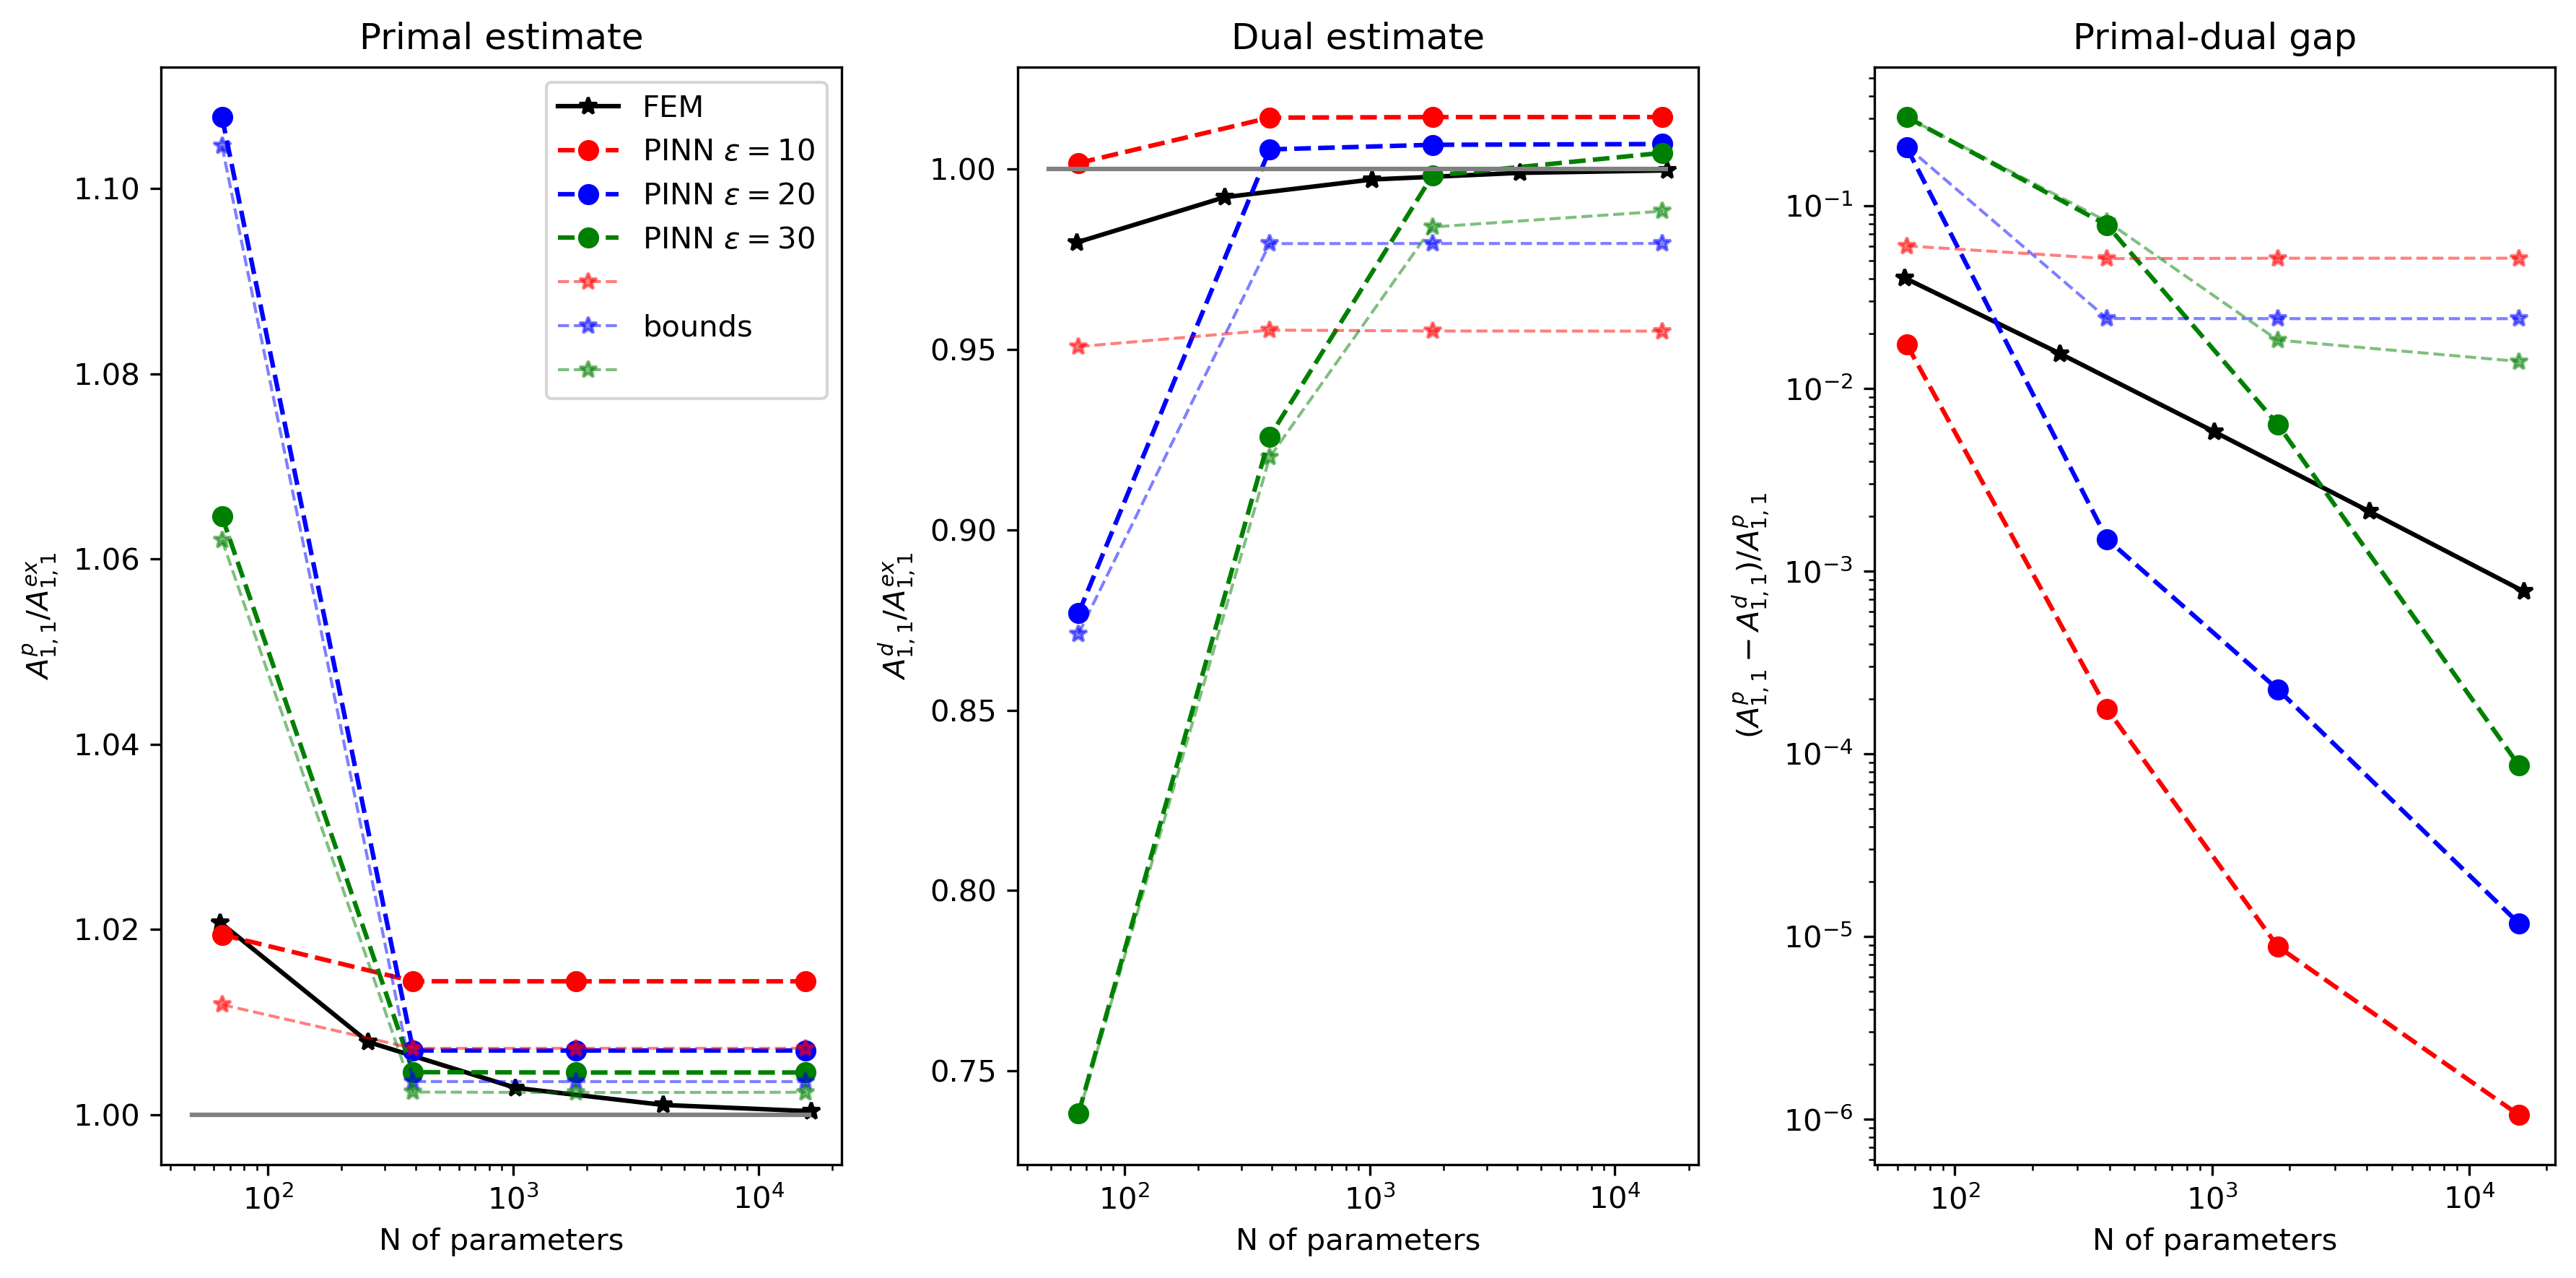

In [8]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,12/2), dpi=300)

axs[0].plot((grid_size-1)**2, upper_bounds_FE/A_ex, 'k-*')
axs[0].plot(par_size, upper_bounds_PINN_10/A_ex, 'r--o')
axs[0].plot(par_size, upper_bounds_PINN_20/A_ex, 'b--o')
axs[0].plot(par_size, upper_bounds_PINN_30/A_ex, 'g--o')
axs[0].plot(par_size, upper_bounds_PINN_i_10/A_ex, 'r--*', alpha=0.5, linewidth=1)
axs[0].plot(par_size, upper_bounds_PINN_i_20/A_ex, 'b--*', alpha=0.5, linewidth=1)
axs[0].plot(par_size, upper_bounds_PINN_i_30/A_ex, 'g--*', alpha=0.5, linewidth=1)
axs[0].plot(pars, a_ex, c='grey')
axs[0].set_xlabel('N of parameters')
axs[0].set_ylabel('$A^p_{1,1} / A^{ex}_{1,1}$')
axs[0].legend(['FEM', 'PINN $\epsilon =10$', 'PINN $\epsilon =20$', 'PINN $\epsilon =30$', '', 'bounds', ''])
axs[0].set_xscale('log')
axs[0].set_title('Primal estimate')

axs[1].plot((grid_size-1)**2, lower_bounds_FE/A_ex, 'k-*')
axs[1].plot(par_size, lower_bounds_PINN_10/A_ex, 'r--o')
axs[1].plot(par_size, lower_bounds_PINN_20/A_ex, 'b--o')
axs[1].plot(par_size, lower_bounds_PINN_30/A_ex, 'g--o')
axs[1].plot(par_size, lower_bounds_PINN_i_10/A_ex, 'r--*', alpha=0.5, linewidth=1)
axs[1].plot(par_size, lower_bounds_PINN_i_20/A_ex, 'b--*', alpha=0.5, linewidth=1)
axs[1].plot(par_size, lower_bounds_PINN_i_30/A_ex, 'g--*', alpha=0.5, linewidth=1)
axs[1].plot(pars, a_ex, c='grey')
axs[1].set_xlabel('N of parameters')
axs[1].set_ylabel('$A^d_{1,1} / A^{ex}_{1,1}$')
#axs[1].legend(['FEM', 'PINN $\epsilon =10$', 'PINN $\epsilon =20$', 'PINN $\epsilon =30$', '', 'bounds', ''])
axs[1].set_xscale('log')
axs[1].set_title('Dual estimate')

axs[2].plot((grid_size-1)**2, (upper_bounds_FE-lower_bounds_FE)/upper_bounds_FE, 'k-*')
axs[2].plot(par_size, (upper_bounds_PINN_10-lower_bounds_PINN_10)/upper_bounds_PINN_10, 'r--o')
axs[2].plot(par_size, (upper_bounds_PINN_20-lower_bounds_PINN_20)/upper_bounds_PINN_20, 'b--o')
axs[2].plot(par_size, (upper_bounds_PINN_30-lower_bounds_PINN_30)/upper_bounds_PINN_30, 'g--o')
axs[2].plot(par_size, (upper_bounds_PINN_i_10-lower_bounds_PINN_i_10)/upper_bounds_PINN_i_10, 'r--*', alpha=0.5, linewidth=1)
axs[2].plot(par_size, (upper_bounds_PINN_i_20-lower_bounds_PINN_i_20)/upper_bounds_PINN_i_20, 'b--*', alpha=0.5, linewidth=1)
axs[2].plot(par_size, (upper_bounds_PINN_i_30-lower_bounds_PINN_i_30)/upper_bounds_PINN_i_30, 'g--*', alpha=0.5, linewidth=1)
axs[2].set_xlabel('N of parameters')
axs[2].set_ylabel('$(A^p_{1,1}-A^d_{1,1}) / A^p_{1,1}$')
#axs[2].legend(['FEM', 'PINN $\epsilon =10$', 'PINN $\epsilon =20$', 'PINN $\epsilon =30$', '', 'bounds', ''])
axs[2].set_xscale('log')
axs[2].set_yscale('log')
axs[2].set_title('Primal-dual gap')

plt.tight_layout()

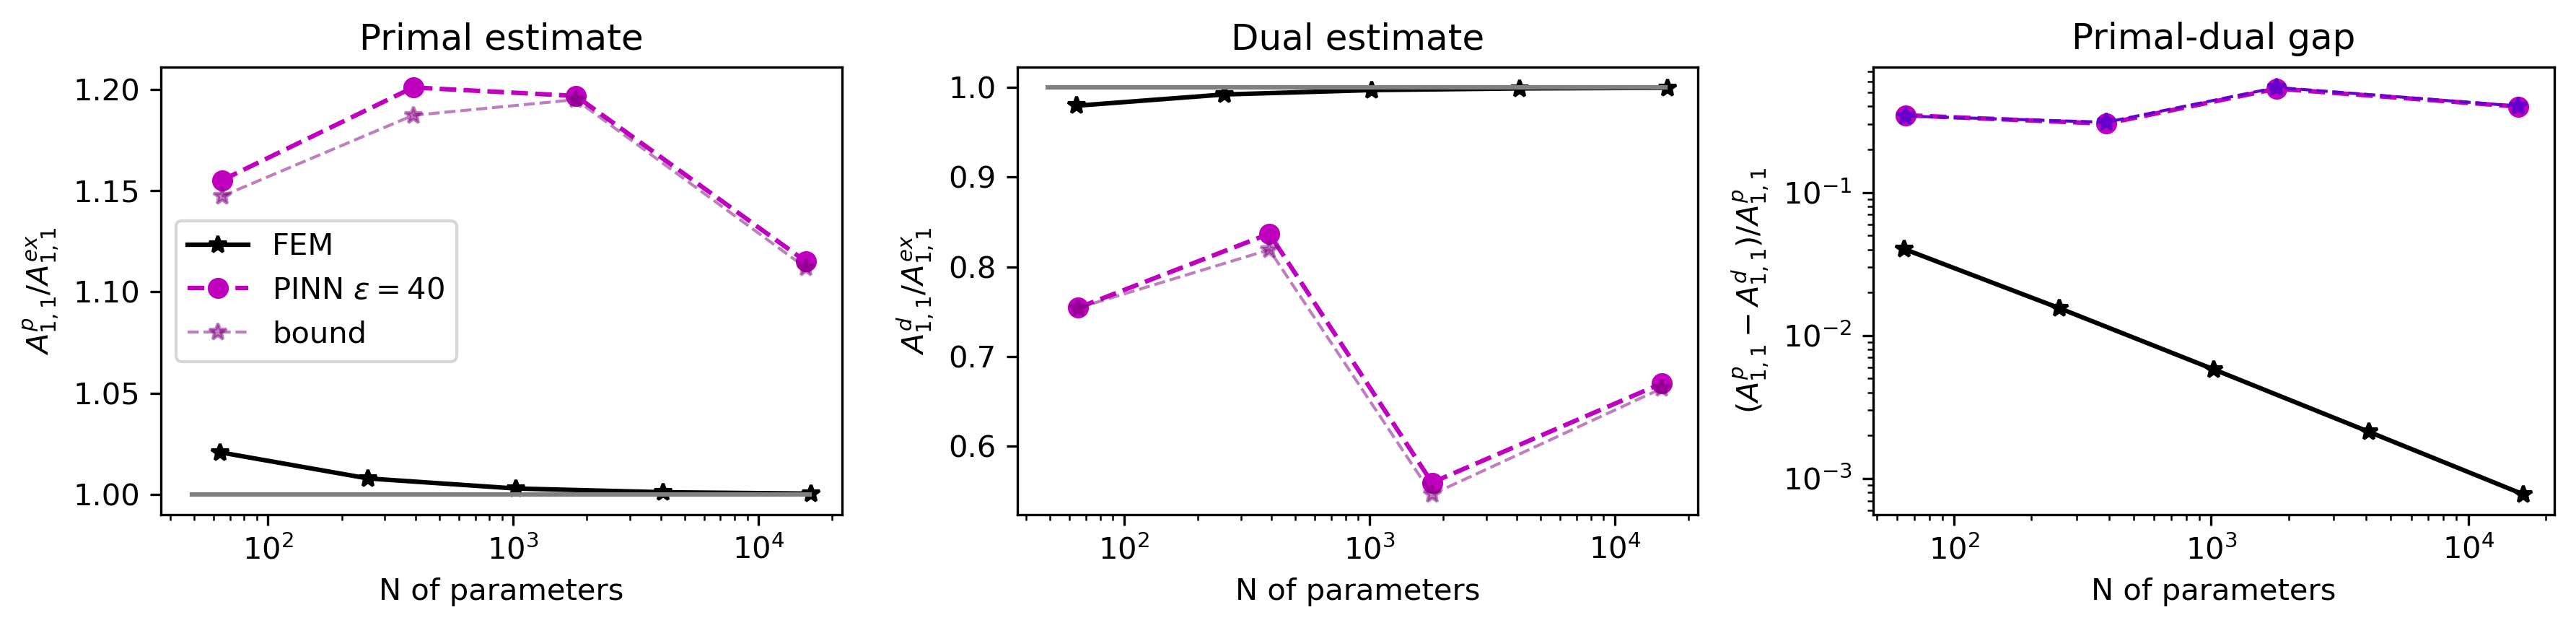

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,3), dpi=300)

axs[0].plot((grid_size-1)**2, upper_bounds_FE/A_ex, 'k-*')
axs[0].plot(par_size, upper_bounds_PINN_40/A_ex, 'm--o')
axs[0].plot(par_size, upper_bounds_PINN_i_40/A_ex, '--*', alpha=0.5, c=[0.5, 0, 0.5], linewidth=1)
axs[0].plot(pars, a_ex, c='grey')
axs[0].set_xlabel('N of parameters')
axs[0].set_ylabel('$A^p_{1,1} / A^{ex}_{1,1}$')
axs[0].legend(['FEM', 'PINN $\epsilon = 40$', 'bound'])
axs[0].set_xscale('log')
axs[0].set_title('Primal estimate')

axs[1].plot((grid_size-1)**2, lower_bounds_FE/A_ex, 'k-*')
axs[1].plot(par_size, lower_bounds_PINN_40/A_ex, 'm--o')
axs[1].plot(par_size, lower_bounds_PINN_i_40/A_ex, '--*', alpha=0.5, c=[0.5, 0, 0.5], linewidth=1)
axs[1].plot(pars, a_ex, c='grey')
axs[1].set_xlabel('N of parameters')
axs[1].set_ylabel('$A^d_{1,1} / A^{ex}_{1,1}$')
#axs[1].legend(['FEM', 'PINN $\epsilon = 40$', 'bound'])
axs[1].set_xscale('log')
axs[1].set_title('Dual estimate')

axs[2].plot((grid_size-1)**2, (upper_bounds_FE-lower_bounds_FE)/upper_bounds_FE, 'k-*')
axs[2].plot(par_size, (upper_bounds_PINN_40-lower_bounds_PINN_40)/upper_bounds_PINN_40, 'm--o')
axs[2].plot(par_size, (upper_bounds_PINN_i_40-lower_bounds_PINN_i_40)/upper_bounds_PINN_i_40, '--*', alpha=1, c=[0.4, 0, 0.8], linewidth=1)
axs[2].set_xlabel('N of parameters')
axs[2].set_ylabel('$(A^p_{1,1}-A^d_{1,1}) / A^p_{1,1}$')
#axs[2].legend(['FEM', 'PINN $\epsilon = 40$', 'bound'])
axs[2].set_xscale('log')
axs[2].set_yscale('log')
axs[2].set_title('Primal-dual gap')

plt.tight_layout()

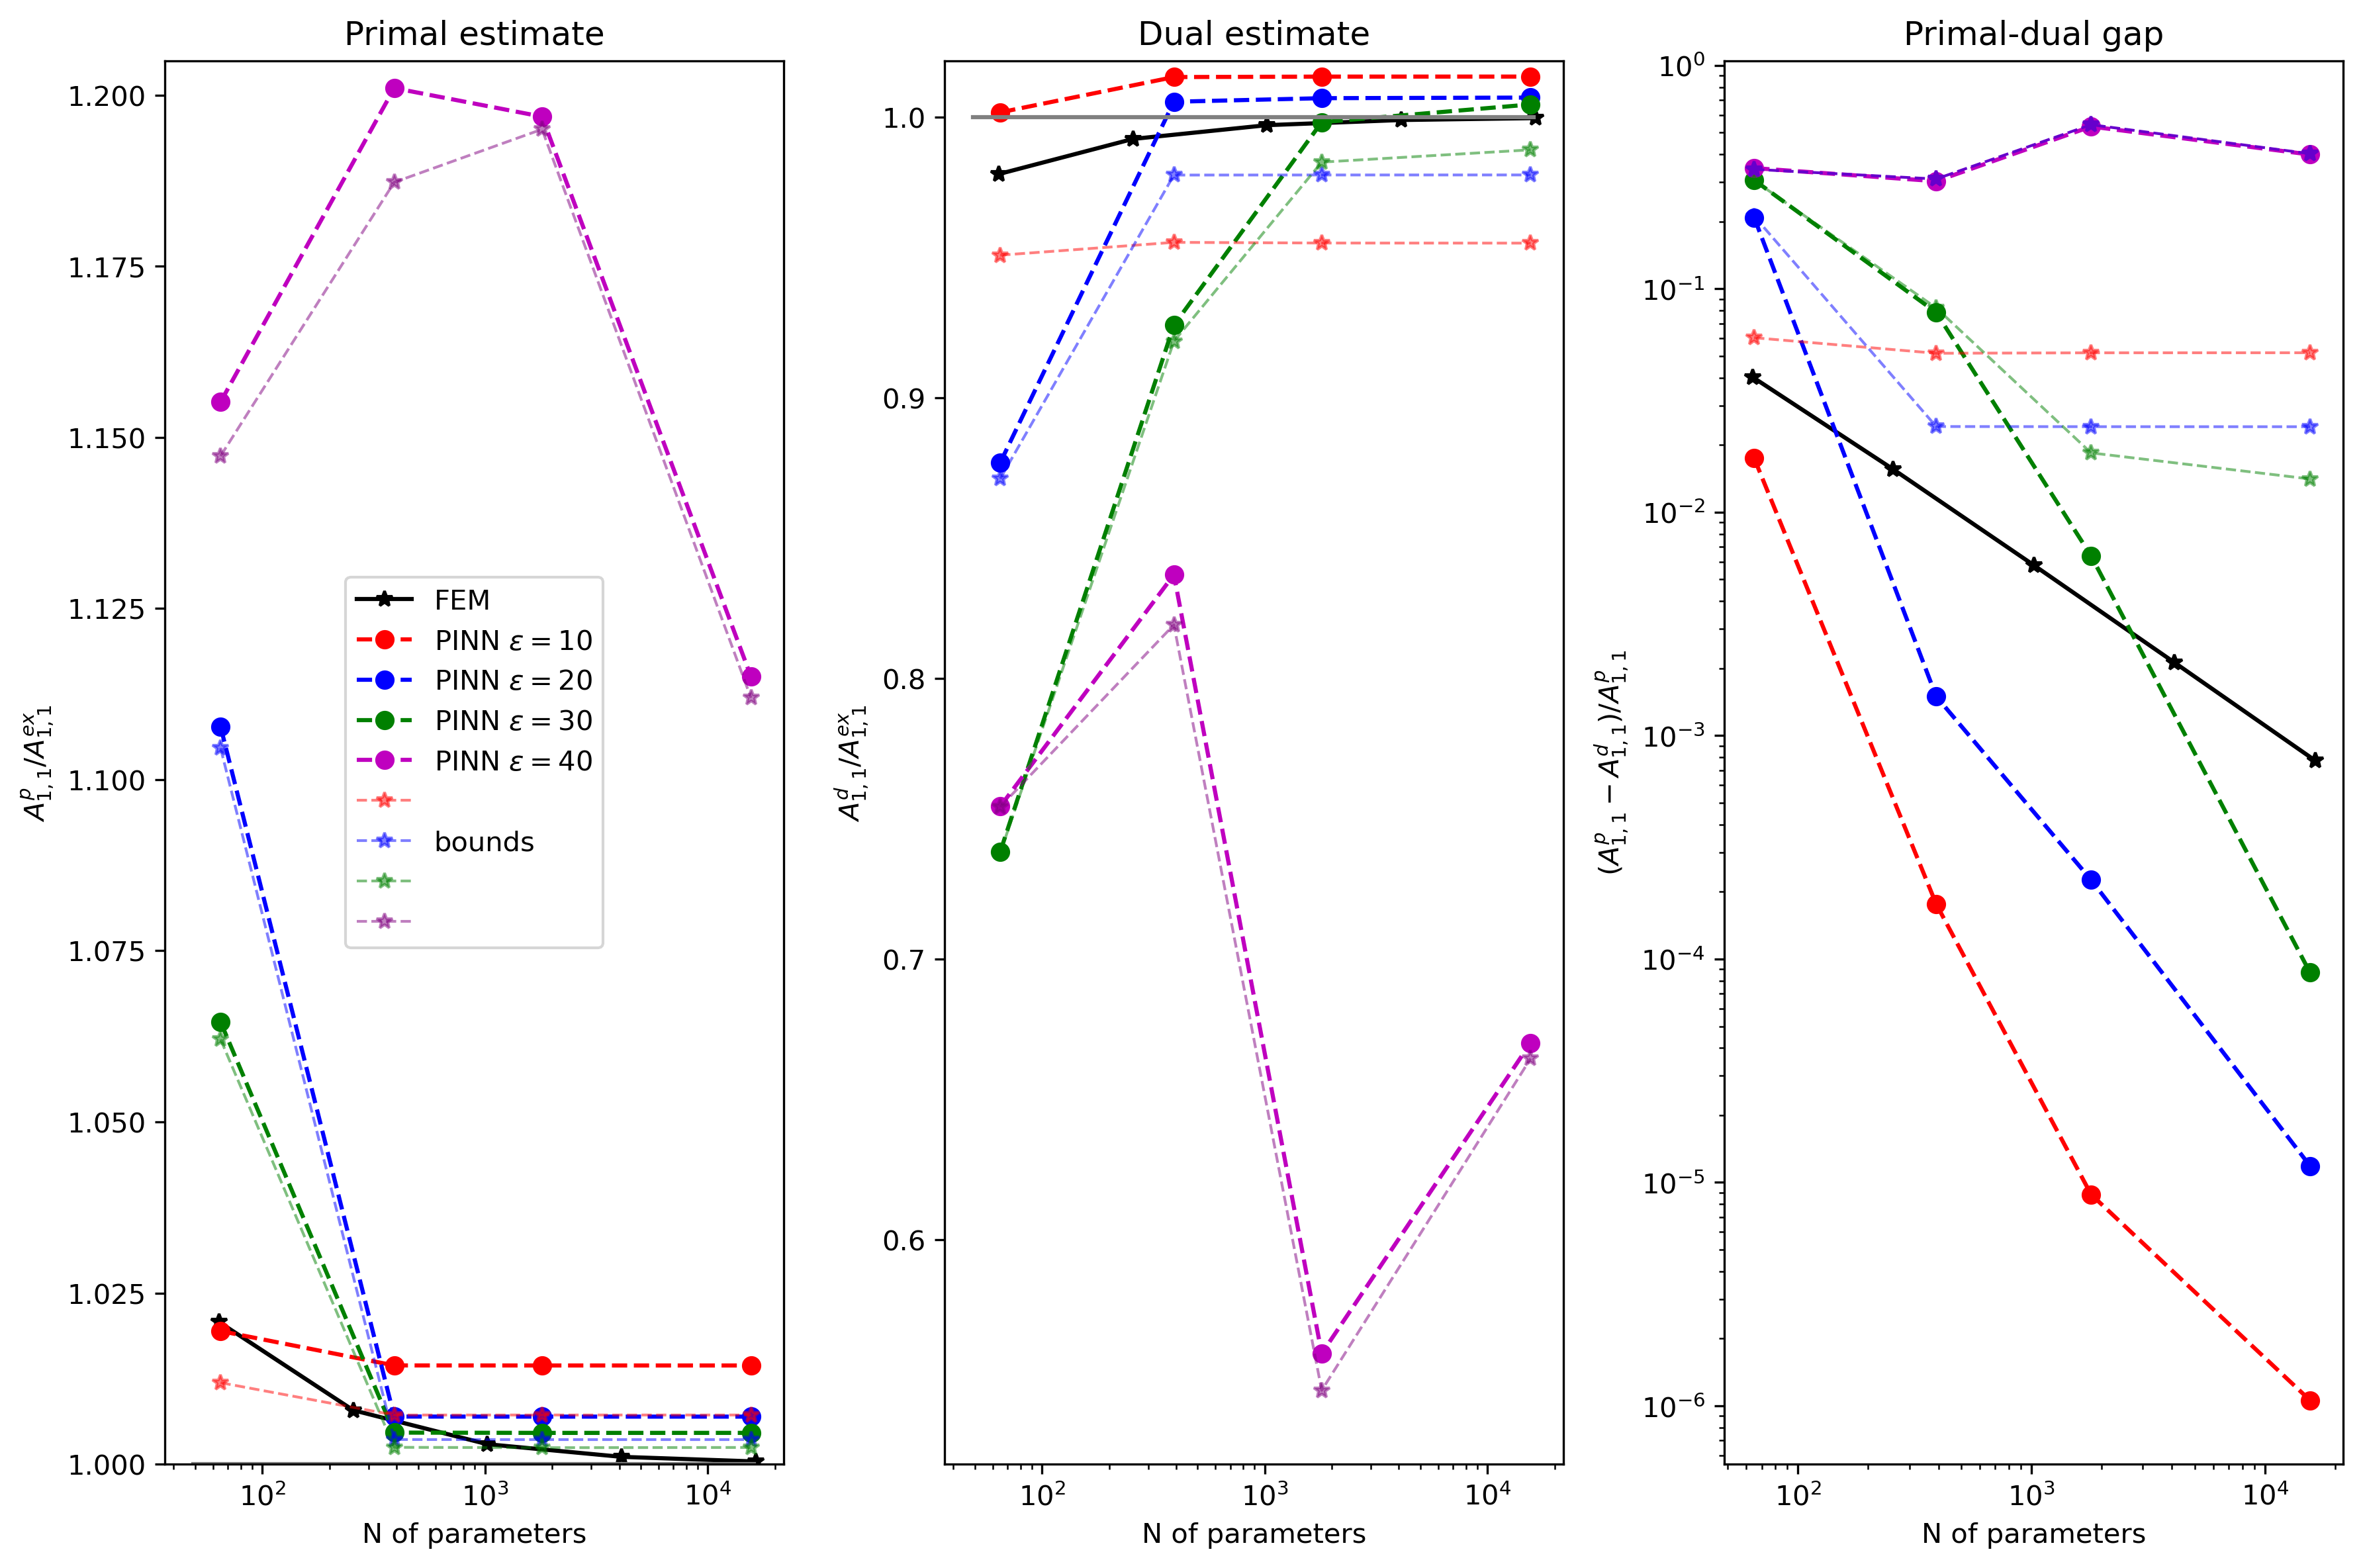

In [10]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,12/1.5), dpi=300)

axs[0].plot((grid_size-1)**2, upper_bounds_FE/A_ex, 'k-*')
axs[0].plot(par_size, upper_bounds_PINN_10/A_ex, 'r--o')
axs[0].plot(par_size, upper_bounds_PINN_20/A_ex, 'b--o')
axs[0].plot(par_size, upper_bounds_PINN_30/A_ex, 'g--o')
axs[0].plot(par_size, upper_bounds_PINN_40/A_ex, 'm--o')
axs[0].plot(par_size, upper_bounds_PINN_i_10/A_ex, 'r--*', alpha=0.5, linewidth=1)
axs[0].plot(par_size, upper_bounds_PINN_i_20/A_ex, 'b--*', alpha=0.5, linewidth=1)
axs[0].plot(par_size, upper_bounds_PINN_i_30/A_ex, 'g--*', alpha=0.5, linewidth=1)
axs[0].plot(par_size, upper_bounds_PINN_i_40/A_ex, '--*', alpha=0.5, c=[0.5, 0, 0.5], linewidth=1)
axs[0].plot(pars, a_ex, c='grey')
axs[0].set_xlabel('N of parameters')
axs[0].set_ylabel('$A^p_{1,1} / A^{ex}_{1,1}$')
axs[0].legend(['FEM', 'PINN $\epsilon =10$', 'PINN $\epsilon =20$', 'PINN $\epsilon =30$', 'PINN $\epsilon =40$', '', 'bounds', '', ''])
axs[0].set_xscale('log')
axs[0].set_ylim([1,1.205])
axs[0].set_title('Primal estimate')

axs[1].plot((grid_size-1)**2, lower_bounds_FE/A_ex, 'k-*')
axs[1].plot(par_size, lower_bounds_PINN_10/A_ex, 'r--o')
axs[1].plot(par_size, lower_bounds_PINN_20/A_ex, 'b--o')
axs[1].plot(par_size, lower_bounds_PINN_30/A_ex, 'g--o')
axs[1].plot(par_size, lower_bounds_PINN_40/A_ex, 'm--o')
axs[1].plot(par_size, lower_bounds_PINN_i_10/A_ex, 'r--*', alpha=0.5, linewidth=1)
axs[1].plot(par_size, lower_bounds_PINN_i_20/A_ex, 'b--*', alpha=0.5, linewidth=1)
axs[1].plot(par_size, lower_bounds_PINN_i_30/A_ex, 'g--*', alpha=0.5, linewidth=1)
axs[1].plot(par_size, lower_bounds_PINN_i_40/A_ex, '--*', alpha=0.5, c=[0.5, 0, 0.5], linewidth=1)
axs[1].plot(pars, a_ex, c='grey')
axs[1].set_xlabel('N of parameters')
axs[1].set_ylabel('$A^d_{1,1} / A^{ex}_{1,1}$')
#axs[1].legend(['FEM', 'PINN $\epsilon =10$', 'PINN $\epsilon =20$', 'PINN $\epsilon =30$', '', 'bounds', ''])
axs[1].set_xscale('log')
axs[1].set_ylim([0.52,1.02])
axs[1].set_title('Dual estimate')

axs[2].plot((grid_size-1)**2, (upper_bounds_FE-lower_bounds_FE)/upper_bounds_FE, 'k-*')
axs[2].plot(par_size, (upper_bounds_PINN_10-lower_bounds_PINN_10)/upper_bounds_PINN_10, 'r--o')
axs[2].plot(par_size, (upper_bounds_PINN_20-lower_bounds_PINN_20)/upper_bounds_PINN_20, 'b--o')
axs[2].plot(par_size, (upper_bounds_PINN_30-lower_bounds_PINN_30)/upper_bounds_PINN_30, 'g--o')
axs[2].plot(par_size, (upper_bounds_PINN_40-lower_bounds_PINN_40)/upper_bounds_PINN_40, 'm--o')
axs[2].plot(par_size, (upper_bounds_PINN_i_10-lower_bounds_PINN_i_10)/upper_bounds_PINN_i_10, 'r--*', alpha=0.5, linewidth=1)
axs[2].plot(par_size, (upper_bounds_PINN_i_20-lower_bounds_PINN_i_20)/upper_bounds_PINN_i_20, 'b--*', alpha=0.5, linewidth=1)
axs[2].plot(par_size, (upper_bounds_PINN_i_30-lower_bounds_PINN_i_30)/upper_bounds_PINN_i_30, 'g--*', alpha=0.5, linewidth=1)
axs[2].plot(par_size, (upper_bounds_PINN_i_40-lower_bounds_PINN_i_40)/upper_bounds_PINN_i_40, '--*', alpha=1, c=[0.4, 0, 0.8], linewidth=1)
axs[2].set_xlabel('N of parameters')
axs[2].set_ylabel('$(A^p_{1,1}-A^d_{1,1}) / A^p_{1,1}$')
#axs[2].legend(['FEM', 'PINN $\epsilon =10$', 'PINN $\epsilon =20$', 'PINN $\epsilon =30$', '', 'bounds', ''])
axs[2].set_xscale('log')
axs[2].set_yscale('log')
axs[2].set_title('Primal-dual gap')

plt.tight_layout()

In [11]:
n_train_p = np.zeros((4, 40000))
par_p = np.zeros((4, 40000))
n_train_d = np.zeros((4, 40000))
par_d = np.zeros((4, 40000))
eps = 10
for n in range(4):
    n_train_p[n, :] = np.load(f'NN_library/training_data/square/PINN_primal_{eps}_{par_size[n]}.npy')[0,:]
    par_p[n, :] = np.load(f'NN_library/training_data/square/PINN_primal_{eps}_{par_size[n]}.npy')[1,:]
    n_train_d[n, :] = np.load(f'NN_library/training_data/square/PINN_dual_{eps}_{par_size[n]}.npy')[0,:]
    par_d[n, :] = np.load(f'NN_library/training_data/square/PINN_dual_{eps}_{par_size[n]}.npy')[1,:]

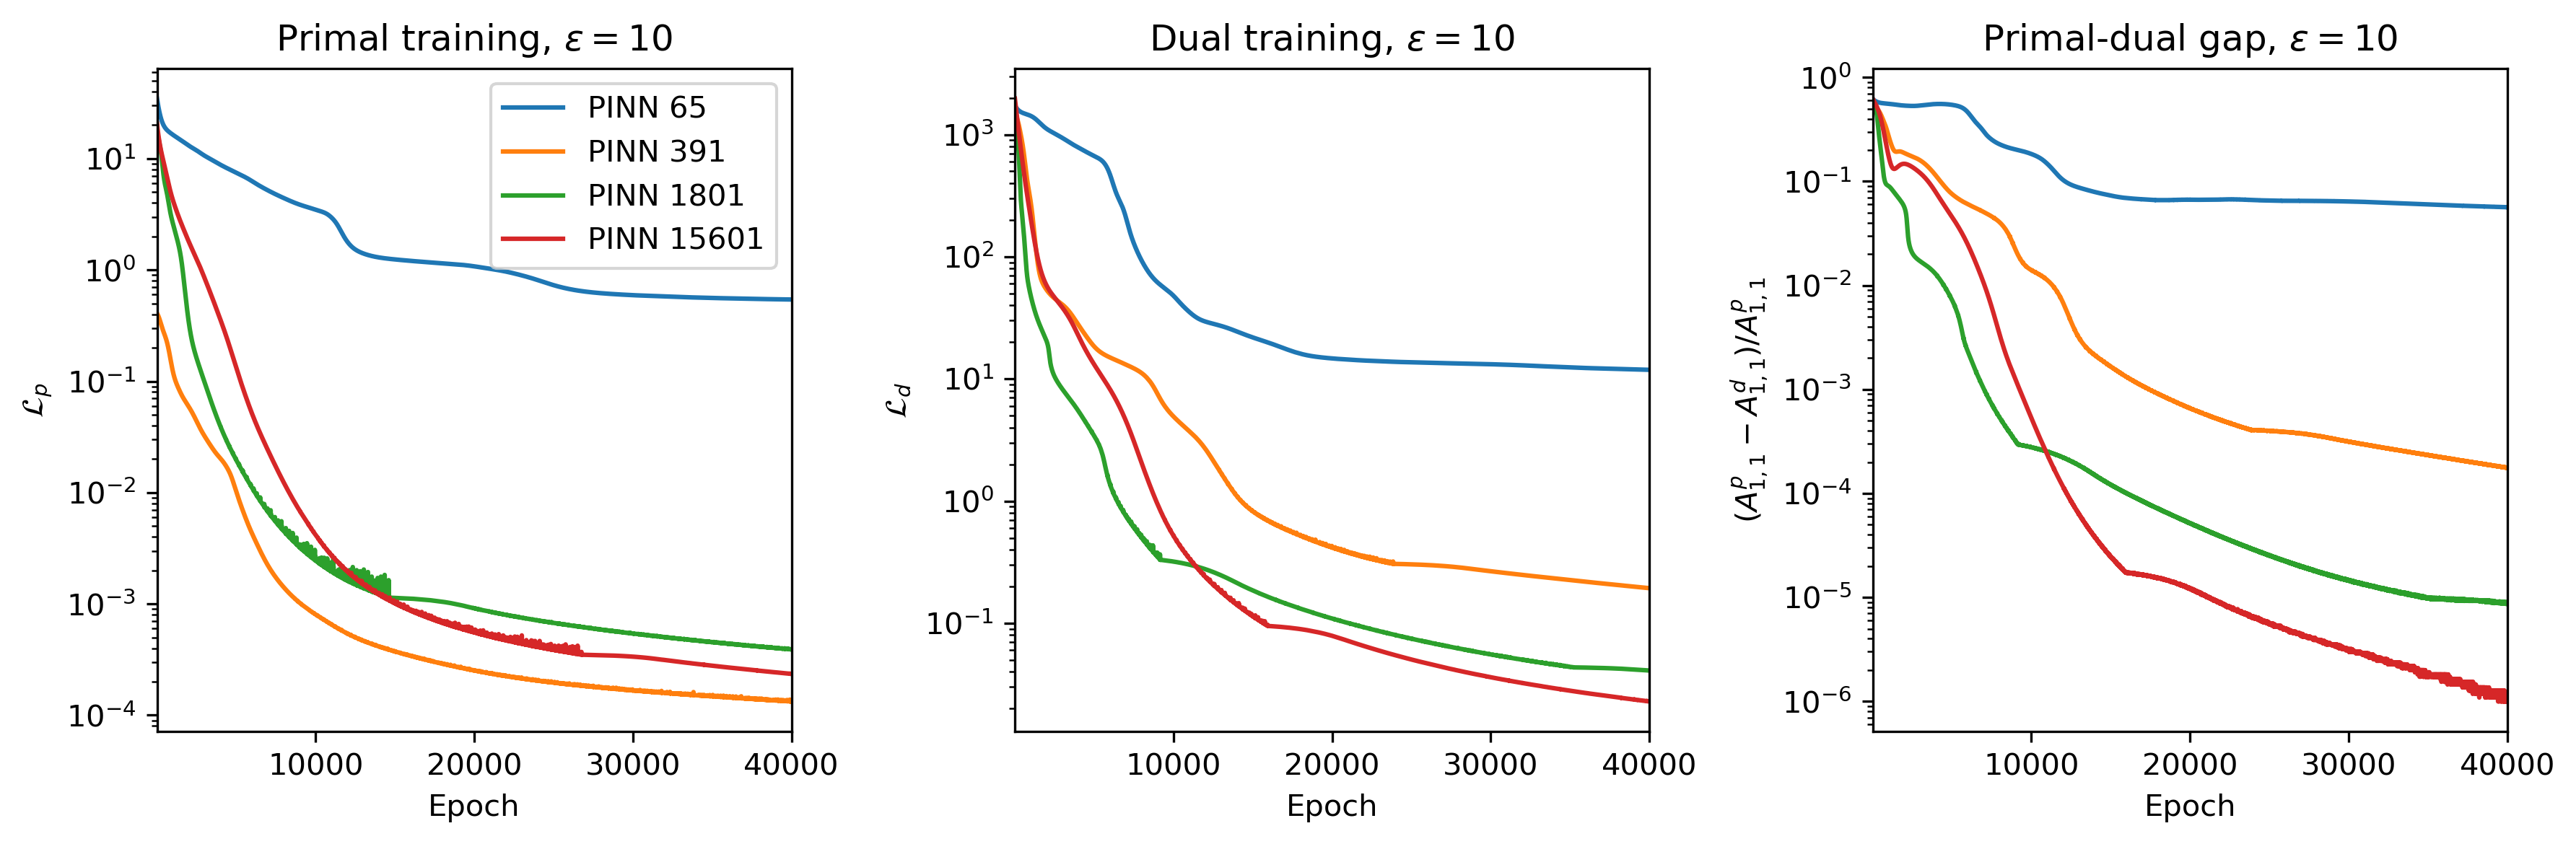

In [12]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,4), dpi=300)

axs[0].plot(np.arange(1, 40001), n_train_p.T)
axs[0].set_xlim([1, 40000])
axs[0].set_yscale('log')
axs[0].legend(['PINN 65', 'PINN 391', 'PINN 1801', 'PINN 15601'])
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('$\mathcal{L}_p$')
axs[0].set_title(f'Primal training, $\epsilon={eps}$')

axs[1].plot(np.arange(1, 40001), n_train_d.T)
axs[1].set_xlim([1, 40000])
axs[1].set_yscale('log')
#axs[1].legend(['PINN 65', 'PINN 391', 'PINN 1801', 'PINN 15601'])
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('$\mathcal{L}_d$')
axs[1].set_title(f'Dual training, $\epsilon={eps}$')

axs[2].plot(np.arange(1, 40001), ((par_p-par_d)/par_p).T)
axs[2].set_xlim([1, 40000])
axs[2].set_yscale('log')
#axs[2].legend(['PINN 65', 'PINN 391', 'PINN 1801', 'PINN 15601'])
axs[2].set_xlabel('Epoch')
axs[2].set_ylabel('$(A^p_{1,1}-A^d_{1,1}) / A^p_{1,1}$')
axs[2].set_title(f'Primal-dual gap, $\epsilon={eps}$')

plt.tight_layout()

In [13]:
upper_bounds_VSPINN_70 = []
lower_bounds_VSPINN_70 = []
upper_bounds_VSPINN_70_i = []
lower_bounds_VSPINN_70_i = []
upper_bounds_VSPINN_126 = []
lower_bounds_VSPINN_126 = []
upper_bounds_VSPINN_126_i = []
lower_bounds_VSPINN_126_i = []
par_size = np.array([65, 391, 1801, 15601])

N_test = 70
for N in par_size:
    upper_bounds_VSPINN_70.append(np.load(f'bounds/square/A_u_VSPINN_{N}_{N_test}.npy')[0])
    lower_bounds_VSPINN_70.append(np.load(f'bounds/square/A_l_VSPINN_{N}_{N_test}.npy')[0])
    upper_bounds_VSPINN_70_i.append(np.load(f'bounds/square/A_u_VSPINN_{N}_{N_test}.npy')[1])
    lower_bounds_VSPINN_70_i.append(np.load(f'bounds/square/A_l_VSPINN_{N}_{N_test}.npy')[1])
upper_bounds_VSPINN_70 = np.array(upper_bounds_VSPINN_70)
lower_bounds_VSPINN_70 = np.array(lower_bounds_VSPINN_70)
upper_bounds_VSPINN_70_i = np.array(upper_bounds_VSPINN_70_i)
lower_bounds_VSPINN_70_i = np.array(lower_bounds_VSPINN_70_i)

N_test = 126
for N in par_size:
    upper_bounds_VSPINN_126.append(np.load(f'bounds/square/A_u_VSPINN_{N}_{N_test}.npy')[0])
    lower_bounds_VSPINN_126.append(np.load(f'bounds/square/A_l_VSPINN_{N}_{N_test}.npy')[0])
    upper_bounds_VSPINN_126_i.append(np.load(f'bounds/square/A_u_VSPINN_{N}_{N_test}.npy')[1])
    lower_bounds_VSPINN_126_i.append(np.load(f'bounds/square/A_l_VSPINN_{N}_{N_test}.npy')[1])
upper_bounds_VSPINN_126 = np.array(upper_bounds_VSPINN_126)
lower_bounds_VSPINN_126 = np.array(lower_bounds_VSPINN_126)
upper_bounds_VSPINN_126_i = np.array(upper_bounds_VSPINN_126_i)
lower_bounds_VSPINN_126_i = np.array(lower_bounds_VSPINN_126_i)

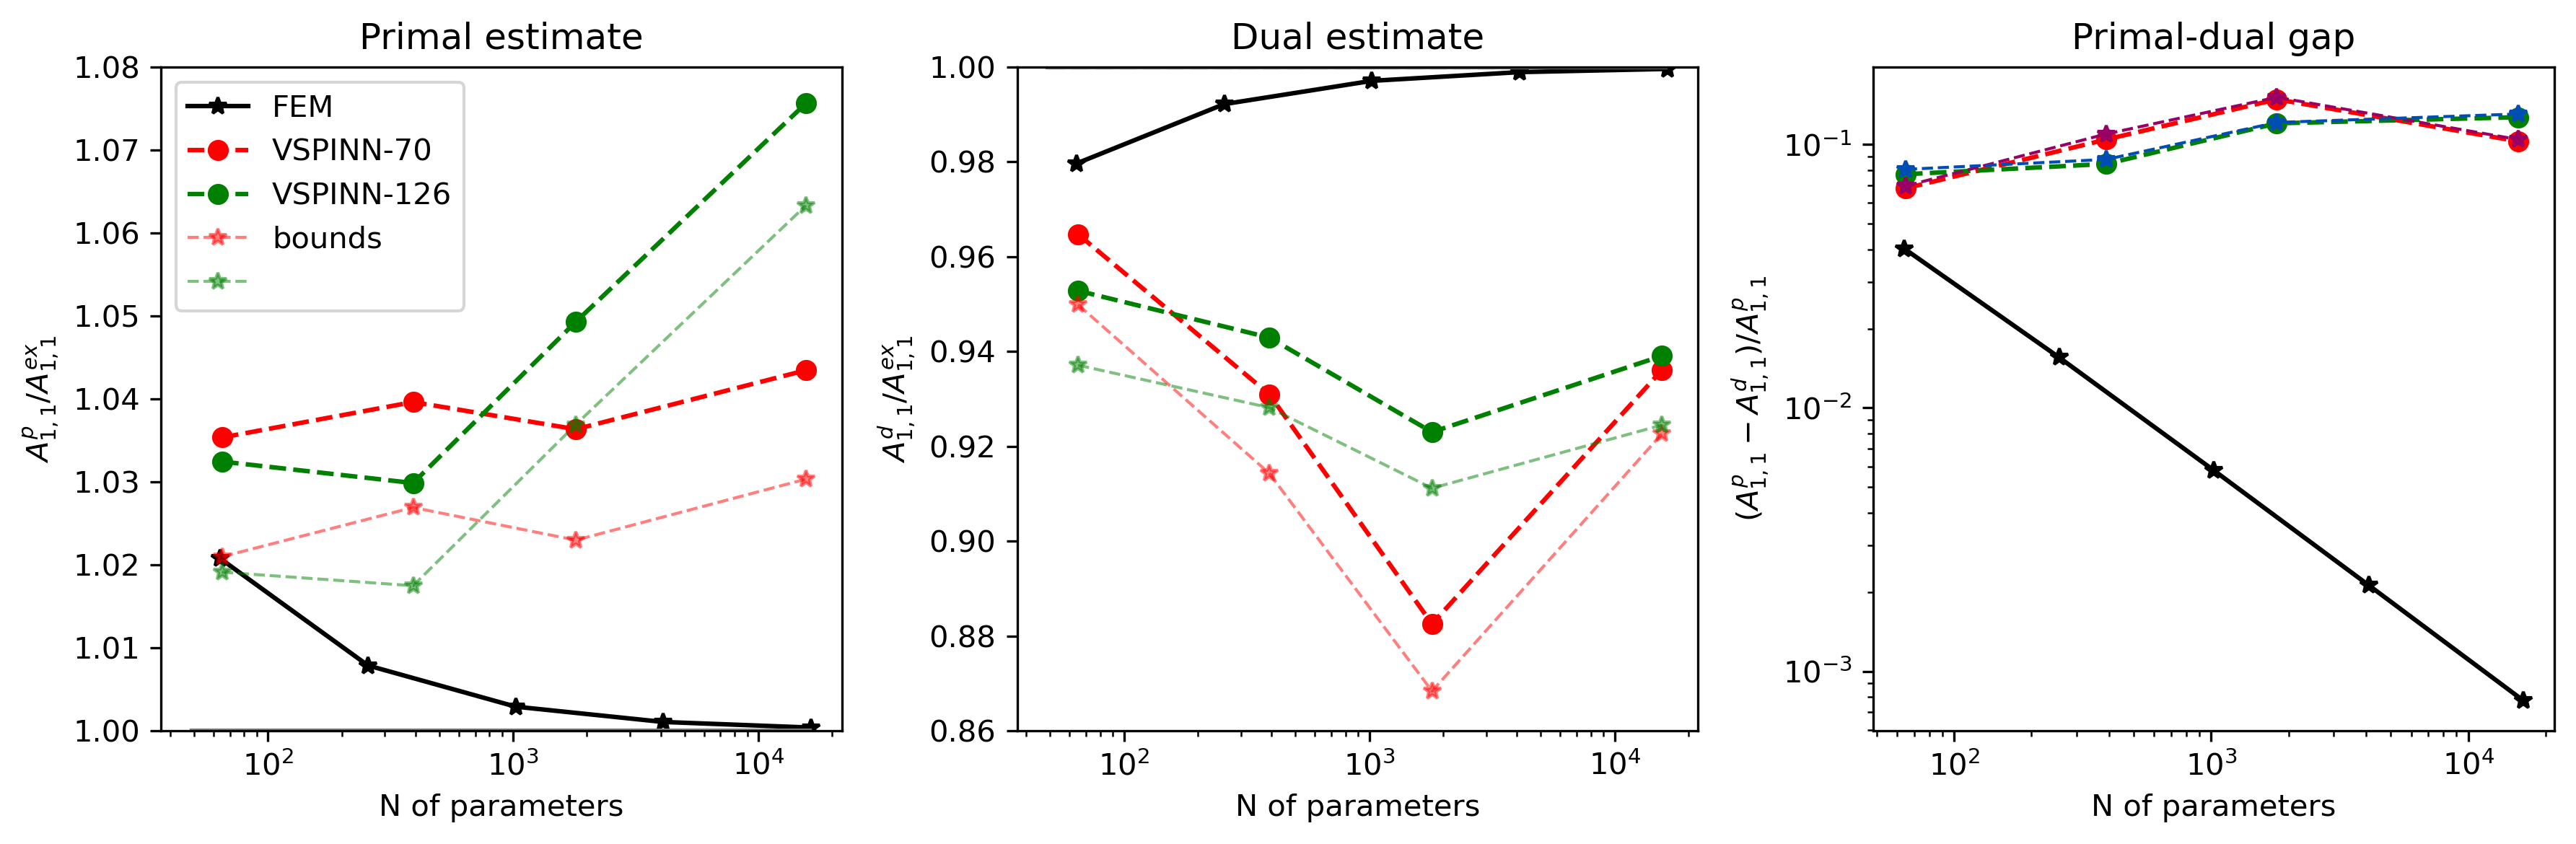

In [17]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,4), dpi=300)

axs[0].plot((grid_size-1)**2, upper_bounds_FE/A_ex, 'k-*')
axs[0].plot(par_size, upper_bounds_VSPINN_70/A_ex, 'r--o')
axs[0].plot(par_size, upper_bounds_VSPINN_126/A_ex, 'g--o')
axs[0].plot(par_size, upper_bounds_VSPINN_70_i/A_ex, 'r--*', alpha=0.5, linewidth=1)
axs[0].plot(par_size, upper_bounds_VSPINN_126_i/A_ex, 'g--*', alpha=0.5, linewidth=1)
axs[0].plot(pars, a_ex, c='grey')
axs[0].set_xlabel('N of parameters')
axs[0].set_ylabel('$A^p_{1,1} / A^{ex}_{1,1}$')
axs[0].legend(['FEM', 'VSPINN-70', 'VSPINN-126', 'bounds', ''])
axs[0].set_xscale('log')
axs[0].set_ylim([1, 1.08])
axs[0].set_title('Primal estimate')

axs[1].plot(pars, a_ex, '--', c='grey')
axs[1].plot((grid_size-1)**2, lower_bounds_FE/A_ex, 'k-*')
axs[1].plot(par_size, lower_bounds_VSPINN_70/A_ex, 'r--o')
axs[1].plot(par_size, lower_bounds_VSPINN_126/A_ex, 'g--o')
axs[1].plot(par_size, lower_bounds_VSPINN_70_i/A_ex, 'r--*', alpha=0.5, linewidth=1)
axs[1].plot(par_size, lower_bounds_VSPINN_126_i/A_ex, 'g--*', alpha=0.5, linewidth=1)
axs[1].plot(pars, a_ex, c='grey')
axs[1].set_xlabel('N of parameters')
axs[1].set_ylabel('$A^d_{1,1} / A^{ex}_{1,1}$')
#axs[1].legend(['FEM', 'VSPINN-70', 'VSPINN-126', 'bounds-70', 'bounds-126'])
axs[1].set_xscale('log')
axs[1].set_ylim([0.86, 1.])
axs[1].set_title('Dual estimate')

axs[2].plot((grid_size-1)**2, (upper_bounds_FE-lower_bounds_FE)/upper_bounds_FE, 'k-*')
axs[2].plot(par_size, (upper_bounds_VSPINN_70-lower_bounds_VSPINN_70)/upper_bounds_VSPINN_70, 'r--o')
axs[2].plot(par_size, (upper_bounds_VSPINN_126-lower_bounds_VSPINN_126)/upper_bounds_VSPINN_126, 'g--o')
axs[2].plot(par_size, (upper_bounds_VSPINN_70_i-lower_bounds_VSPINN_70_i)/upper_bounds_VSPINN_70_i, '--*', linewidth=1, c=[0.6, 0, 0.4])
axs[2].plot(par_size, (upper_bounds_VSPINN_126_i-lower_bounds_VSPINN_126_i)/upper_bounds_VSPINN_126_i, '--*', linewidth=1, c=[0, 0.3, 0.7])
axs[2].set_xlabel('N of parameters')
axs[2].set_ylabel('$(A^p_{1,1}-A^d_{1,1}) / A^p_{1,1}$')
#axs[2].legend(['FEM', 'VSPINN-70', 'VSPINN-126', 'bounds-70', 'bounds-126'])
axs[2].set_xscale('log')
axs[2].set_yscale('log')
axs[2].set_title('Primal-dual gap')

plt.tight_layout()

In [103]:
upper_bounds_VNPINN_50 = []
lower_bounds_VNPINN_50 = []
upper_bounds_VNPINN_50_i = []
lower_bounds_VNPINN_50_i = []
par_size = np.array([65, 391, 1801, 15601])
N_test = 50
for N in par_size:
    upper_bounds_VNPINN_50.append(np.load(f'bounds/square/A_u_VNPINN_{N}_{N_test}.npy')[0])
    lower_bounds_VNPINN_50.append(np.load(f'bounds/square/A_l_VNPINN_{N}_{N_test}.npy')[0])
    upper_bounds_VNPINN_50_i.append(np.load(f'bounds/square/A_u_VNPINN_{N}_{N_test}.npy')[1])
    lower_bounds_VNPINN_50_i.append(np.load(f'bounds/square/A_l_VNPINN_{N}_{N_test}.npy')[1])
upper_bounds_VNPINN_50 = np.array(upper_bounds_VNPINN_50)
lower_bounds_VNPINN_50 = np.array(lower_bounds_VNPINN_50)
upper_bounds_VNPINN_50_i = np.array(upper_bounds_VNPINN_50_i)
lower_bounds_VNPINN_50_i = np.array(lower_bounds_VNPINN_50_i)

upper_bounds_VNPINN_100 = []
lower_bounds_VNPINN_100 = []
upper_bounds_VNPINN_100_i = []
lower_bounds_VNPINN_100_i = []
N_test = 100
for N in par_size:
    upper_bounds_VNPINN_100.append(np.load(f'bounds/square/A_u_VNPINN_{N}_{N_test}.npy')[0])
    lower_bounds_VNPINN_100.append(np.load(f'bounds/square/A_l_VNPINN_{N}_{N_test}.npy')[0])
    upper_bounds_VNPINN_100_i.append(np.load(f'bounds/square/A_u_VNPINN_{N}_{N_test}.npy')[1])
    lower_bounds_VNPINN_100_i.append(np.load(f'bounds/square/A_l_VNPINN_{N}_{N_test}.npy')[1])
upper_bounds_VNPINN_100 = np.array(upper_bounds_VNPINN_100)
lower_bounds_VNPINN_100 = np.array(lower_bounds_VNPINN_100)
upper_bounds_VNPINN_100_i = np.array(upper_bounds_VNPINN_100_i)
lower_bounds_VNPINN_100_i = np.array(lower_bounds_VNPINN_100_i)

upper_bounds_VNPINN_200 = []
lower_bounds_VNPINN_200 = []
upper_bounds_VNPINN_200_i = []
lower_bounds_VNPINN_200_i = []
N_test = 200
for N in par_size:
    upper_bounds_VNPINN_200.append(np.load(f'bounds/square/A_u_VNPINN_{N}_{N_test}.npy')[0])
    lower_bounds_VNPINN_200.append(np.load(f'bounds/square/A_l_VNPINN_{N}_{N_test}.npy')[0])
    upper_bounds_VNPINN_200_i.append(np.load(f'bounds/square/A_u_VNPINN_{N}_{N_test}.npy')[1])
    lower_bounds_VNPINN_200_i.append(np.load(f'bounds/square/A_l_VNPINN_{N}_{N_test}.npy')[1])
upper_bounds_VNPINN_200 = np.array(upper_bounds_VNPINN_200)
lower_bounds_VNPINN_200 = np.array(lower_bounds_VNPINN_200)
upper_bounds_VNPINN_200_i = np.array(upper_bounds_VNPINN_200_i)
lower_bounds_VNPINN_200_i = np.array(lower_bounds_VNPINN_200_i)

upper_bounds_VNPINN_400 = []
lower_bounds_VNPINN_400 = []
upper_bounds_VNPINN_400_i = []
lower_bounds_VNPINN_400_i = []
N_test = 400
for N in par_size[2:]:
    upper_bounds_VNPINN_400.append(np.load(f'bounds/square/A_u_VNPINN_{N}_{N_test}.npy')[0])
    lower_bounds_VNPINN_400.append(np.load(f'bounds/square/A_l_VNPINN_{N}_{N_test}.npy')[0])
    upper_bounds_VNPINN_400_i.append(np.load(f'bounds/square/A_u_VNPINN_{N}_{N_test}.npy')[1])
    lower_bounds_VNPINN_400_i.append(np.load(f'bounds/square/A_l_VNPINN_{N}_{N_test}.npy')[1])
upper_bounds_VNPINN_400 = np.array(upper_bounds_VNPINN_400)
lower_bounds_VNPINN_400 = np.array(lower_bounds_VNPINN_400)
upper_bounds_VNPINN_400_i = np.array(upper_bounds_VNPINN_400_i)
lower_bounds_VNPINN_400_i = np.array(lower_bounds_VNPINN_400_i)

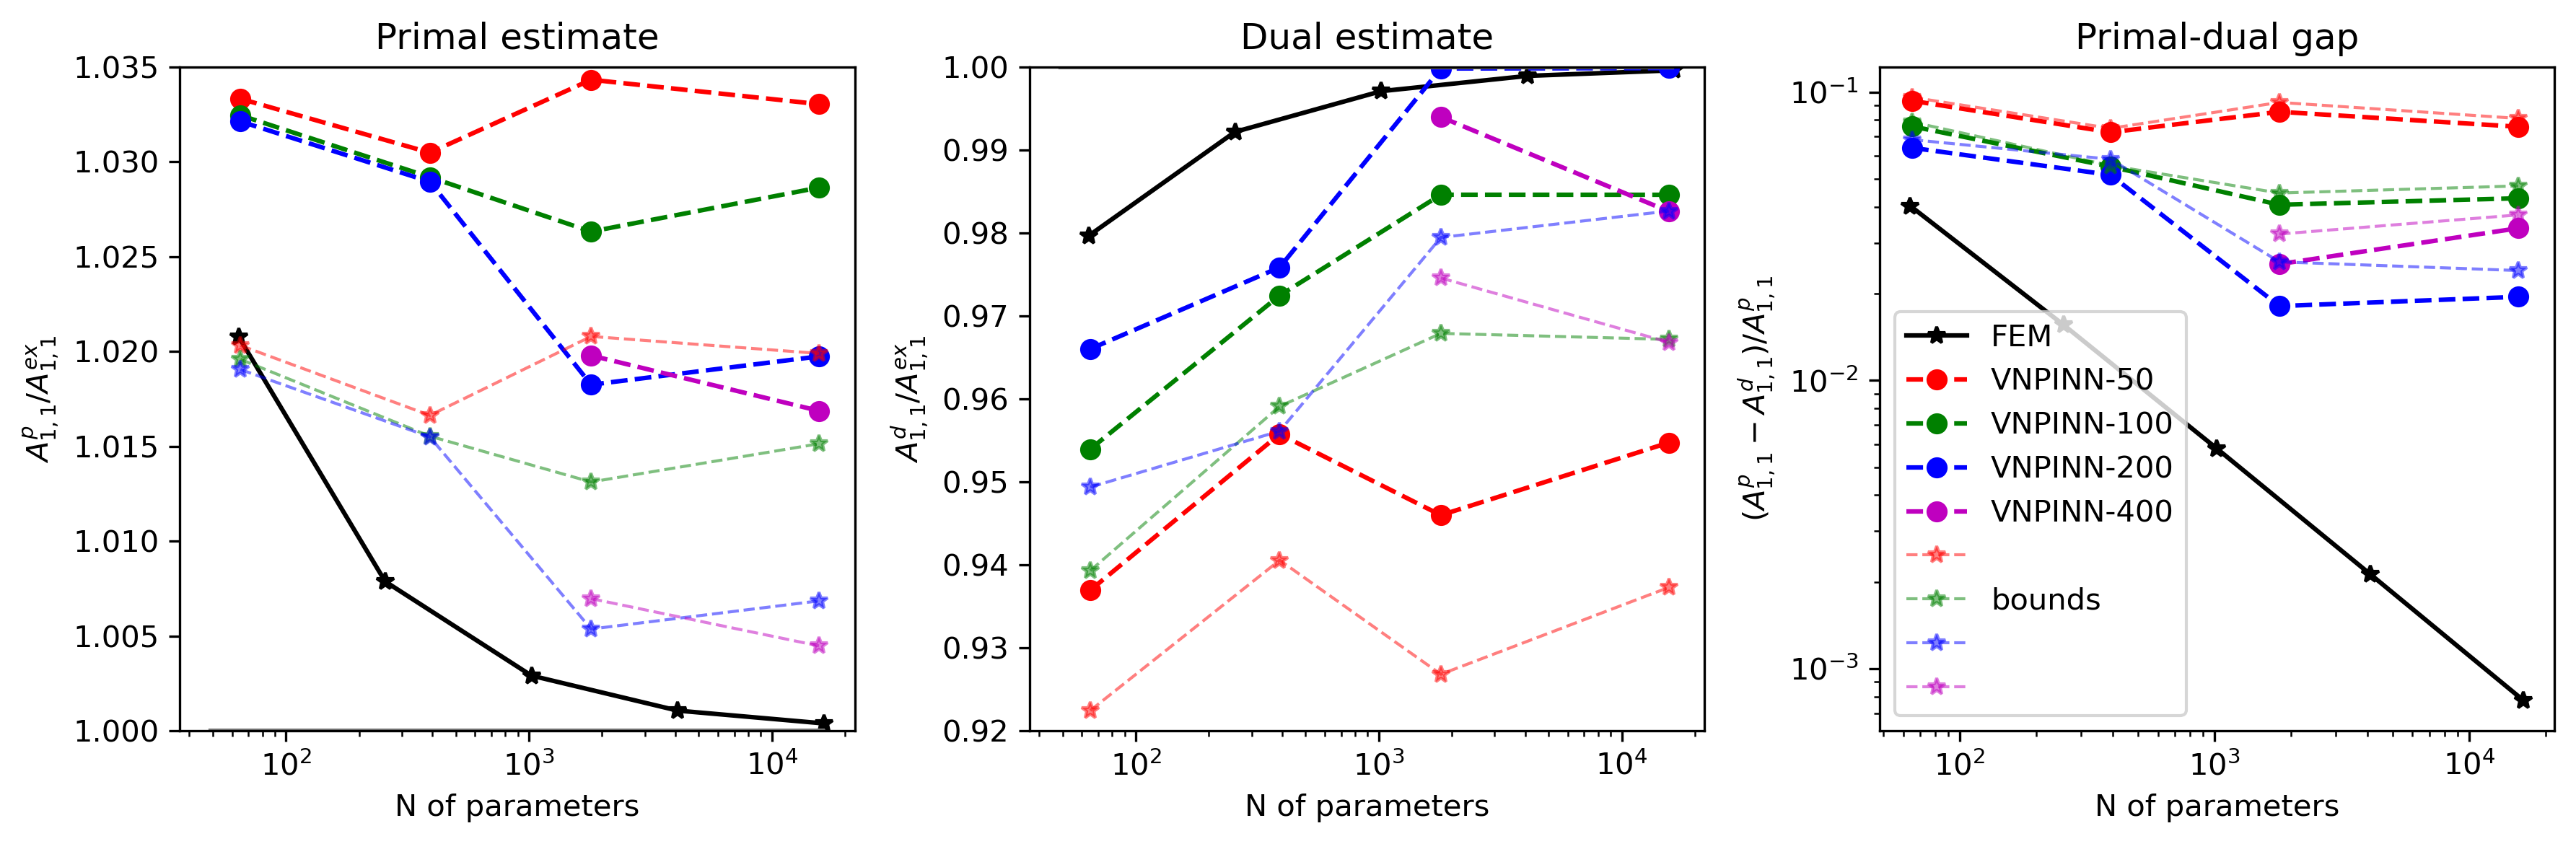

In [114]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,4), dpi=300)

axs[0].plot((grid_size-1)**2, upper_bounds_FE/A_ex, 'k-*')
axs[0].plot(par_size, upper_bounds_VNPINN_50/A_ex, 'r--o')
axs[0].plot(par_size, upper_bounds_VNPINN_100/A_ex, 'g--o')
axs[0].plot(par_size, upper_bounds_VNPINN_200/A_ex, 'b--o')
axs[0].plot(par_size[2:], upper_bounds_VNPINN_400/A_ex, 'm--o')
axs[0].plot(par_size, upper_bounds_VNPINN_50_i/A_ex, 'r--*', alpha=0.5, linewidth=1)
axs[0].plot(par_size, upper_bounds_VNPINN_100_i/A_ex, 'g--*', alpha=0.5, linewidth=1)
axs[0].plot(par_size, upper_bounds_VNPINN_200_i/A_ex, 'b--*', alpha=0.5, linewidth=1)
axs[0].plot(par_size[2:], upper_bounds_VNPINN_400_i/A_ex, 'm--*', alpha=0.5, linewidth=1)
axs[0].plot(pars, a_ex, c='grey')
axs[0].set_xlabel('N of parameters')
axs[0].set_ylabel('$A^p_{1,1} / A^{ex}_{1,1}$')
axs[0].set_ylim([1, 1.035])
#axs[0].legend(['FEM', 'VNPINN-50', 'VNPINN-100', 'VNPINN-200', 'VNPINN-400', '', 'bounds', '', ''])
axs[0].set_xscale('log')
axs[0].set_title('Primal estimate')

axs[1].plot((grid_size-1)**2, lower_bounds_FE/A_ex, 'k-*')
axs[1].plot(par_size, lower_bounds_VNPINN_50/A_ex, 'r--o')
axs[1].plot(par_size, lower_bounds_VNPINN_100/A_ex, 'g--o')
axs[1].plot(par_size, lower_bounds_VNPINN_200/A_ex, 'b--o')
axs[1].plot(par_size[2:], lower_bounds_VNPINN_400/A_ex, 'm--o')
axs[1].plot(par_size, lower_bounds_VNPINN_50_i/A_ex, 'r--*', alpha=0.5, linewidth=1)
axs[1].plot(par_size, lower_bounds_VNPINN_100_i/A_ex, 'g--*', alpha=0.5, linewidth=1)
axs[1].plot(par_size, lower_bounds_VNPINN_200_i/A_ex, 'b--*', alpha=0.5, linewidth=1)
axs[1].plot(par_size[2:], lower_bounds_VNPINN_400_i/A_ex, 'm--*', alpha=0.5, linewidth=1)
axs[1].plot(pars, a_ex, c='grey')
axs[1].set_xlabel('N of parameters')
axs[1].set_ylabel('$A^d_{1,1} / A^{ex}_{1,1}$')
axs[1].set_ylim([0.92, 1.])
#axs[1].legend(['FEM', 'VNPINN-50', 'VNPINN-100', 'VNPINN-200', 'VNPINN-400', '', 'bounds', '', ''])
axs[1].set_xscale('log')
axs[1].set_title('Dual estimate')

axs[2].plot((grid_size-1)**2, (upper_bounds_FE-lower_bounds_FE)/upper_bounds_FE, 'k-*')
axs[2].plot(par_size, (upper_bounds_VNPINN_50-lower_bounds_VNPINN_50)/upper_bounds_VNPINN_50, 'r--o')
axs[2].plot(par_size, (upper_bounds_VNPINN_100-lower_bounds_VNPINN_100)/upper_bounds_VNPINN_100, 'g--o')
axs[2].plot(par_size, (upper_bounds_VNPINN_200-lower_bounds_VNPINN_200)/upper_bounds_VNPINN_200, 'b--o')
axs[2].plot(par_size[2:], (upper_bounds_VNPINN_400-lower_bounds_VNPINN_400)/upper_bounds_VNPINN_400, 'm--o')
axs[2].plot(par_size, (upper_bounds_VNPINN_50_i-lower_bounds_VNPINN_50_i)/upper_bounds_VNPINN_50_i, 'r--*', alpha=0.5, linewidth=1)
axs[2].plot(par_size, (upper_bounds_VNPINN_100_i-lower_bounds_VNPINN_100_i)/upper_bounds_VNPINN_100_i, 'g--*', alpha=0.5, linewidth=1)
axs[2].plot(par_size, (upper_bounds_VNPINN_200_i-lower_bounds_VNPINN_200_i)/upper_bounds_VNPINN_200_i, 'b--*', alpha=0.5, linewidth=1)
axs[2].plot(par_size[2:], (upper_bounds_VNPINN_400_i-lower_bounds_VNPINN_400_i)/upper_bounds_VNPINN_400_i, 'm--*', alpha=0.5, linewidth=1)
axs[2].set_xlabel('N of parameters')
axs[2].set_ylabel('$(A^p_{1,1}-A^d_{1,1}) / A^p_{1,1}$')
axs[2].legend(['FEM', 'VNPINN-50', 'VNPINN-100', 'VNPINN-200', 'VNPINN-400', '', 'bounds', '', ''])
axs[2].set_xscale('log')
axs[2].set_yscale('log')
axs[2].set_title('Primal-dual gap')

plt.tight_layout()

In [115]:
n_train_p = np.zeros((4, 40000))
par_p = np.zeros((4, 40000))
n_train_d = np.zeros((4, 40000))
par_d = np.zeros((4, 40000))
for n in range(4):
    n_train_p[n, :] = np.load(f'NN_library/training_data/square/VNPINN_primal_{par_size[n]}_200.npy')[0,:]
    par_p[n, :] = np.load(f'NN_library/training_data/square/VNPINN_primal_{par_size[n]}_200.npy')[1,:]
    n_train_d[n, :] = np.load(f'NN_library/training_data/square/VNPINN_dual_{par_size[n]}_200.npy')[0,:]
    par_d[n, :] = np.load(f'NN_library/training_data/square/VNPINN_dual_{par_size[n]}_200.npy')[1,:]

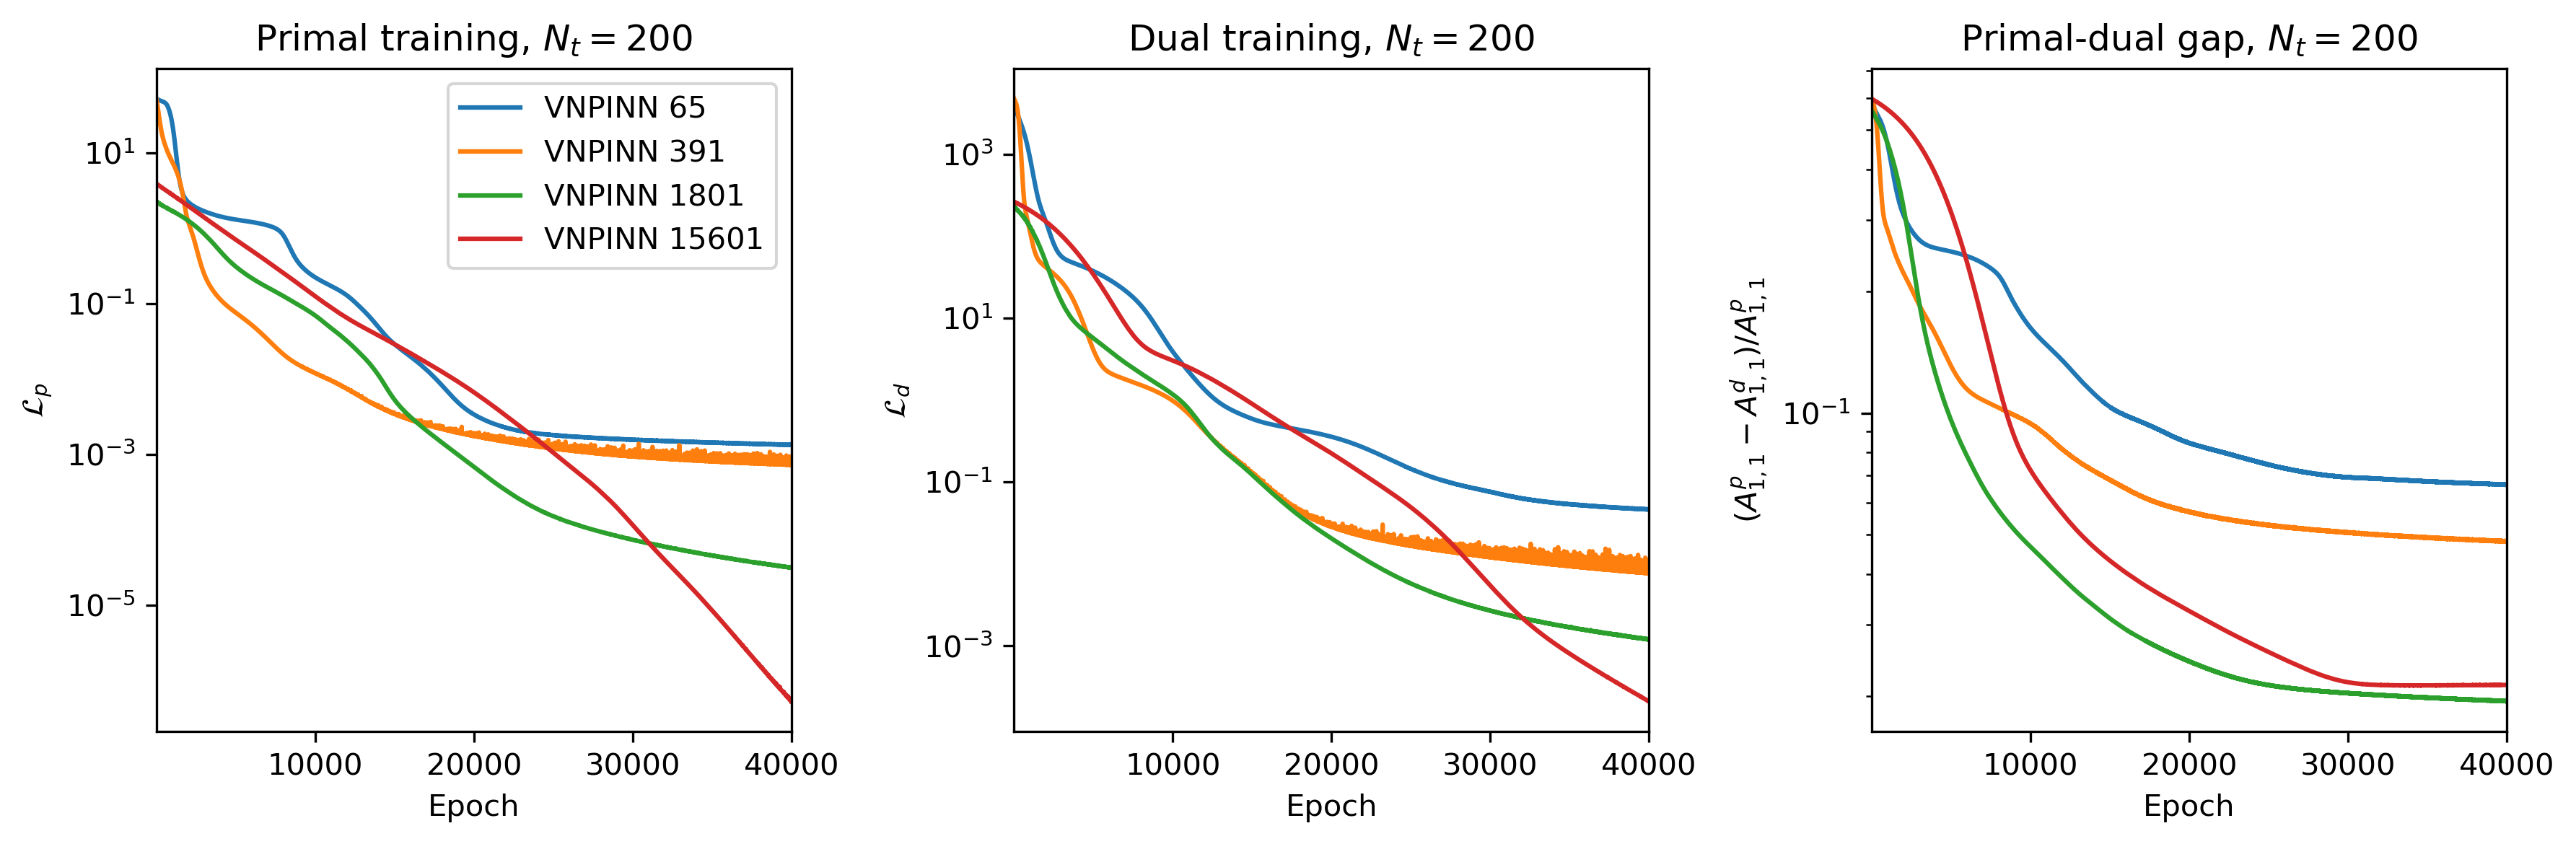

In [120]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,4), dpi=300)

axs[0].plot(np.arange(1, 40001), n_train_p.T)
axs[0].set_xlim([1, 40000])
axs[0].set_yscale('log')
axs[0].legend(['VNPINN 65', 'VNPINN 391', 'VNPINN 1801', 'VNPINN 15601'])
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('$\mathcal{L}_p$')
axs[0].set_title(f'Primal training, $N_t=200$')

axs[1].plot(np.arange(1, 40001), n_train_d.T)
axs[1].set_xlim([1, 40000])
axs[1].set_yscale('log')
#axs[1].legend(['PINN 65', 'PINN 391', 'PINN 1801', 'PINN 15601'])
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('$\mathcal{L}_d$')
axs[1].set_title(f'Dual training, $N_t=200$')

axs[2].plot(np.arange(1, 40001), ((par_p-par_d)/par_p).T)
axs[2].set_xlim([1, 40000])
axs[2].set_yscale('log')
#axs[2].legend(['PINN 65', 'PINN 391', 'PINN 1801', 'PINN 15601'])
axs[2].set_xlabel('Epoch')
axs[2].set_ylabel('$(A^p_{1,1}-A^d_{1,1}) / A^p_{1,1}$')
axs[2].set_title(f'Primal-dual gap, $N_t=200$')

plt.tight_layout()